## 피마인디언 당뇨병 데이터

* 캐글에서 제공하는 피마인디언 당뇨병 데이터 사용

### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

### 분류와 회귀 이용

* 당뇨병 진단 여부 분류
* 인슐린 수치를 회귀를 통해 예측

## 라이브러리 로드

In [ ]:
# 시각화를 위한 seaborn, matplotlib.pyplot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [ ]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


` 데이터가 다 숫자로 되어있기 때문에 따로 전처리 과정 없이 진행! `

## Feature Engineering

### 수치형 변수를 범주형 변수로 만들기

In [ ]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies","Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


* 아래의 코드에서 'and'가 아닌 '&'을 사용해야 함!

In [ ]:
# One-hot-Encoding
# 수치 => 범주 => 수치
df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age","Age_low","Age_middle","Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<AxesSubplot:xlabel='Age_low', ylabel='count'>

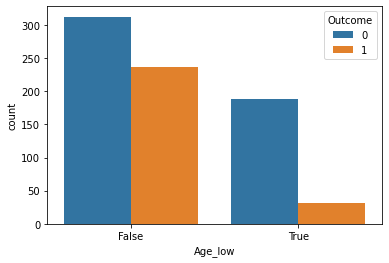

In [ ]:
sns.countplot(data=df, x="Age_low", hue="Outcome")

### 결측치 다루기

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin","Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [ ]:
df["Insulin_nan"].isnull().sum()

374

* 결측치의 값들을 없애기엔 너무 많은 양이기 때문에 결측치를 채워보자!

In [ ]:
# 결측치 비율
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [ ]:
df.groupby(["Outcome"])[["Insulin","Insulin_nan"]].mean()

,Insulin,Insulin_nan
Outcome,,
0,68.792000,130.287879
1,100.335821,206.846154


In [ ]:
df.groupby(["Outcome"])[["Insulin","Insulin_nan"]].describe()

Insulin                                                         \
          count        mean         std  min  25%   50%     75%    max   
Outcome                                                                  
0         500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0   
1         268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0   

        Insulin_nan                                                             
              count        mean         std   min    25%    50%     75%    max  
Outcome                                                                         
0             264.0  130.287879  102.482237  15.0   66.0  102.5  161.25  744.0  
1             130.0  206.846154  132.699898  14.0  127.5  169.5  239.25  846.0

In [ ]:
df.groupby(["Outcome"])[["Insulin","Insulin_nan"]].agg(["mean","median"])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [ ]:
# 결측치 채우기
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5

### 왜도, 첨도, 정규분포

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

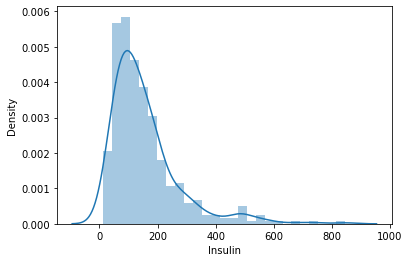

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.distplot(df.loc[df["Insulin"] > 0, "Insulin"])

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

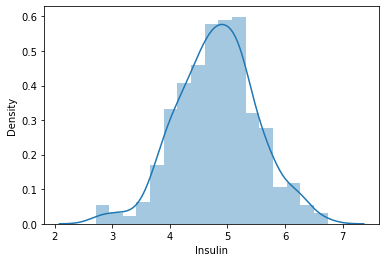

In [ ]:
# 정규 분포 형태
sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))

<AxesSubplot:xlabel='Insulin_nan', ylabel='Density'>

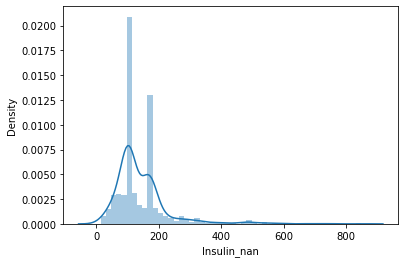

In [ ]:
sns.distplot(df["Insulin_nan"])

<AxesSubplot:xlabel='Insulin_log', ylabel='Density'>

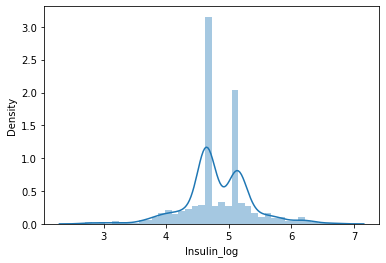

In [ ]:
# -inf 수렴 방지 위해 +1 해주기
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.distplot(df["Insulin_log"])

### 파생변수 만들기

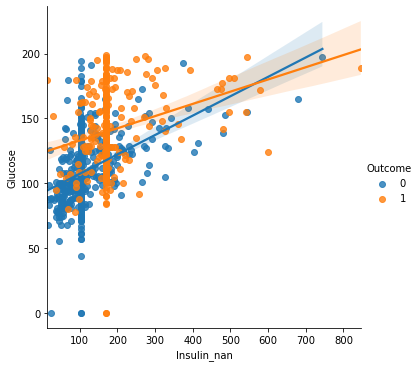

In [ ]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")

* 위의 그래프에서 보이는 일자 점선은 우리가 결측치를 채워준 값이다

In [ ]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [ ]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


* "low_glu_insulin" : 인슐린 & 글루코스 상관계수로 파생변수 생성

### 이상치(outlier) 다루기

<AxesSubplot:xlabel='Insulin'>

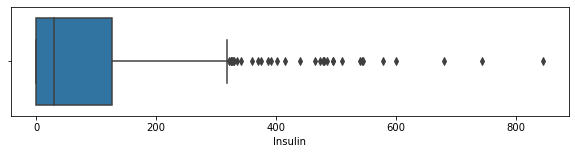

In [ ]:
# 결측치 처리를 안한 경우 밑의 그림처럼 0에 붙어있는 모습
plt.figure(figsize=(10,2))
sns.boxplot(df["Insulin"])

<AxesSubplot:xlabel='Insulin_nan'>

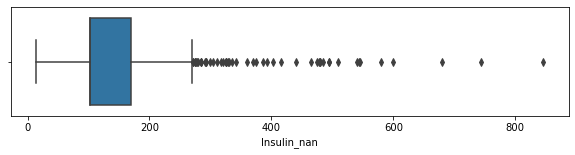

In [ ]:
# 결측치 처리를 한 경우
plt.figure(figsize=(10,2))
sns.boxplot(df["Insulin_nan"])

In [ ]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [ ]:
# 3사분위값
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR3

169.5

In [ ]:
# 1사분위값
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR1

102.5

In [ ]:
# 사분위수 범위 계산
IQR = IQR3 - IQR1
IQR

67.0

In [ ]:
# 이상치
OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [ ]:
# 이상치 개수 확인하기
df[df["Insulin_nan"] > OUT].shape

(51, 16)

In [ ]:
# 이상치 전부를 지우기엔 너무 개수가 많으므로 600이상인 이상치만 빼보기
df[df["Insulin_nan"] > 600].shape

(3, 16)

### Scaling

* 숫자의 범위가 크고, 다른 변수들과 숫자 크기가 차이가 많이 날 때 사용하면 좋다

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Glucose","DiabetesPedigreeFunction"]])
scale = scaler.transform(df[["Glucose","DiabetesPedigreeFunction"]])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [ ]:
# df[["Glucose","DiabetesPedigreeFunction"]] = scale
# df[["Glucose","DiabetesPedigreeFunction"]].head()

,Glucose,DiabetesPedigreeFunction
0,0.848324,0.468492
1,-1.123396,-0.365061
2,1.943724,0.604397
3,-0.998208,-0.920763
4,0.504055,5.484909


array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>]],
      dtype=object)

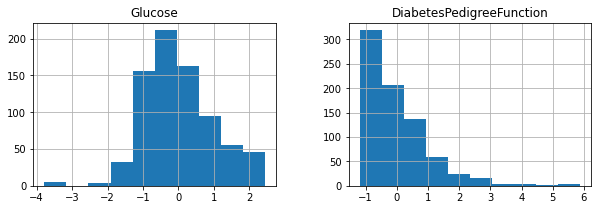

In [ ]:
h = df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize=(10,3))
h

## csv파일로 저장하기

In [ ]:
df.to_csv("data/diabetes_feature.csv")

In [ ]:
pd.read_csv("data/diabetes_feature.csv").head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [ ]:
df.to_csv("data/diabetes_feature.csv",index=False)

In [ ]:
pd.read_csv("data/diabetes_feature.csv").head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습, 예측 데이터셋 나누기

In [ ]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [ ]:
train = df[:split_count].copy()
train.shape

(614, 16)

In [ ]:
train[train["Insulin_nan"] < 600].shape

(610, 16)

In [ ]:
train2 = train[train["Insulin_nan"] < 600]
train2.shape

(610, 16)

In [ ]:
test = df[split_count:].copy()
test.shape

(154, 16)

## 학습, 예측에 사용할 컬럼

In [ ]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져오기
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

## 정답값이자 예측해야 될 값

In [ ]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = "Outcome"
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [ ]:
# 학습 세트 만들기 ex.시험의 기출문제
# X_train = train[feature_names]
# print(X_train.shape)
# X_train.head()

In [ ]:
X_train = train2[feature_names]
print(X_train.shape)
X_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,0.848324,72,35,33.6,0.468492,50,False,206.0,False
1,-1.123396,66,29,26.6,-0.365061,31,False,130.0,False
2,1.943724,64,0,23.3,0.604397,32,True,206.0,False
3,-0.998208,66,23,28.1,-0.920763,21,False,94.0,True
4,0.504055,40,35,43.1,5.484909,33,False,168.0,False


In [ ]:
# 정답 값 ex.기출문제의 정답
# y_train = train[label_name]
# print(y_train.shape)
# y_train.head()

In [ ]:
y_train = train2[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# 예측에 사용할 데이터셋 만들기 ex.실전 시험 문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,0.535352,74,26,36.1,0.257084,50,True,144.0,False
615,-0.466156,72,0,25.8,-0.799958,27,False,130.0,False
616,-0.121888,96,0,28.7,-0.950964,30,False,130.0,False
617,-1.655448,62,13,20.1,-0.648952,23,False,15.0,True
618,-0.278373,82,24,28.2,2.446670,50,True,206.0,False


In [ ]:
# 예측의 정답값 ex.실전 시험 문제의 정답
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 머신러닝 알고리즘 가져오기

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

## 학습(훈련)

* 시험을 볼 때 기출문제와 정답을 보고 공부하는 과정과 유사
- 기출문제 : X_train
- 정답 : y_train

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 예측

- 실전 시험문제(X_test)를 가지고 정답을 직접 예측

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

## 트리 알고리즘 분석하기

* 의사결정나무를 시각화

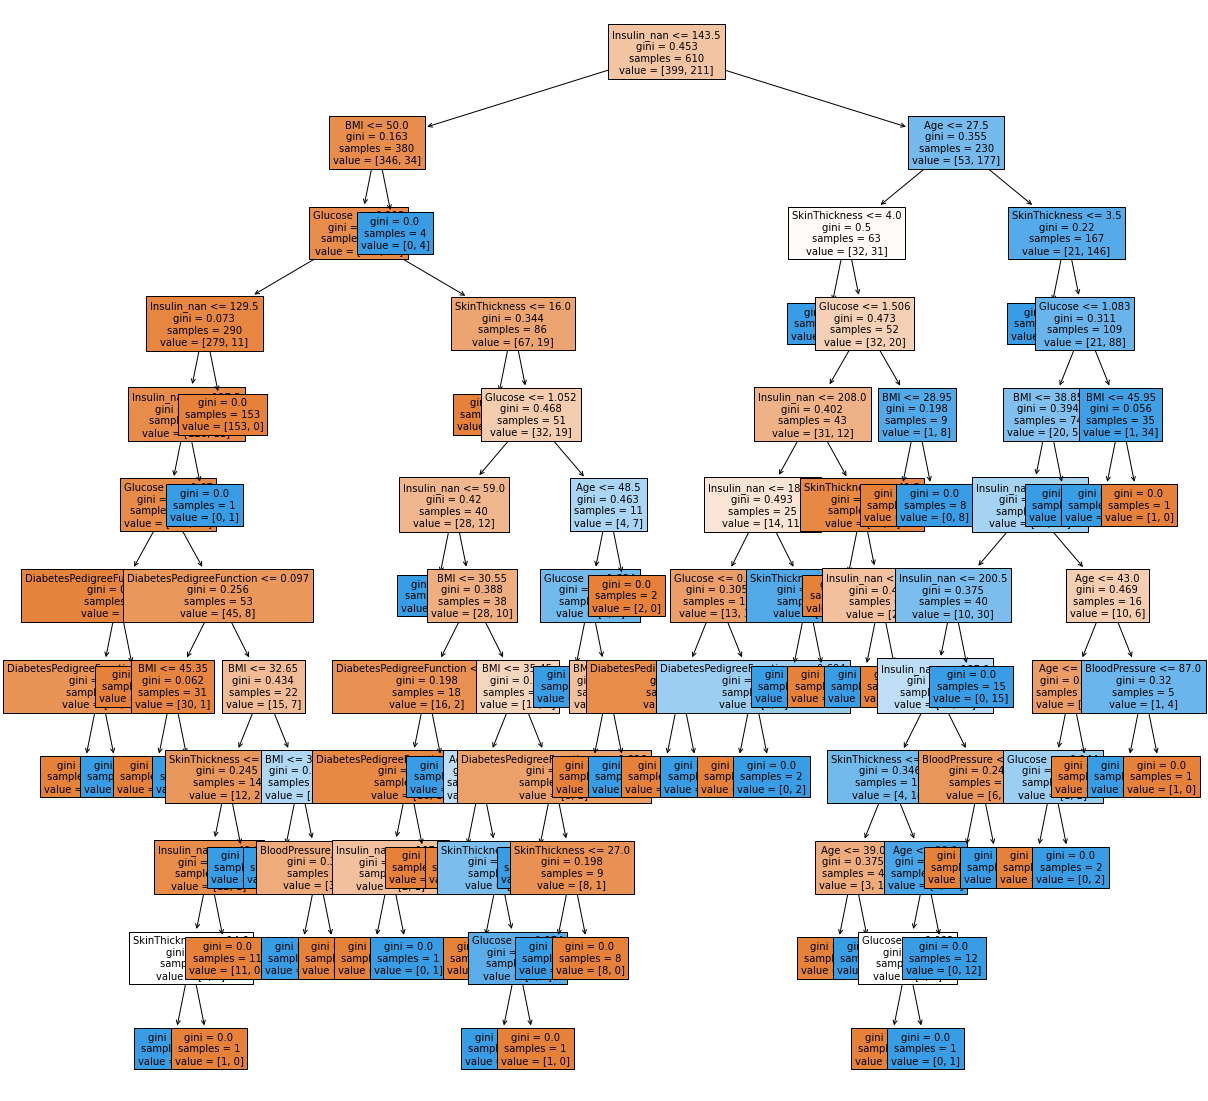

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

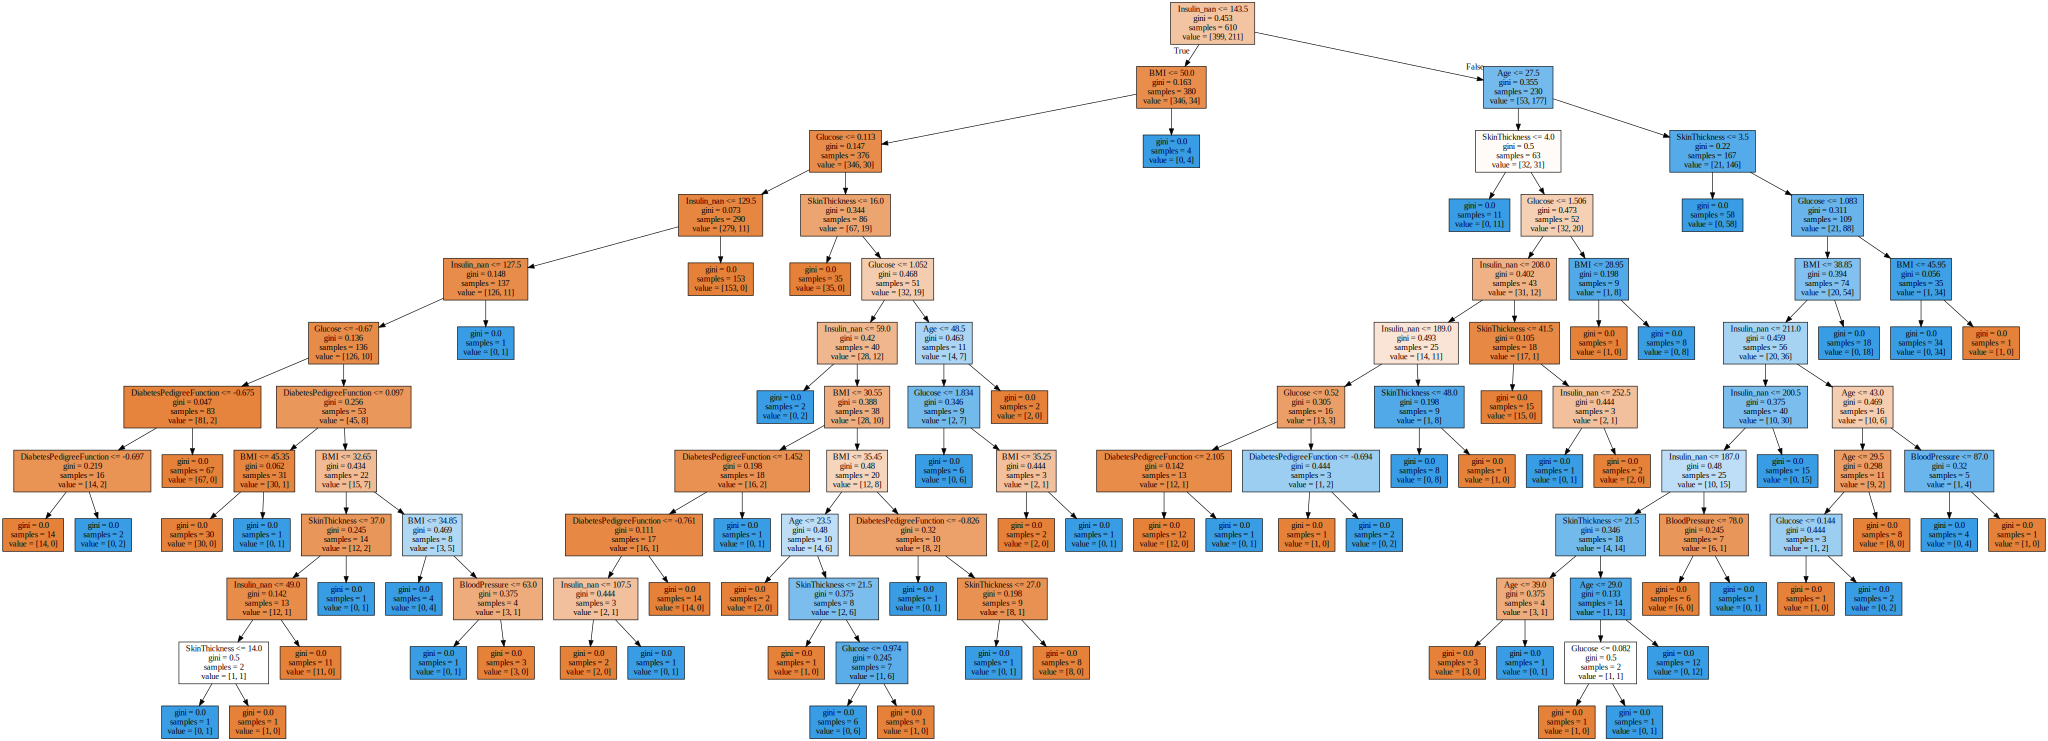

In [ ]:
# graphviz 를 통해 시각화하기
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해주어야함.

import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names = feature_names,
                           filled=True)
graphviz.Source(dot_tree)

In [ ]:
# feature의 중요도를 추출하기

model.feature_importances_

array([0.08429577, 0.0174412 , 0.09525366, 0.09044522, 0.04648602,
       0.08718957, 0.        , 0.57888857, 0.        ])

<AxesSubplot:>

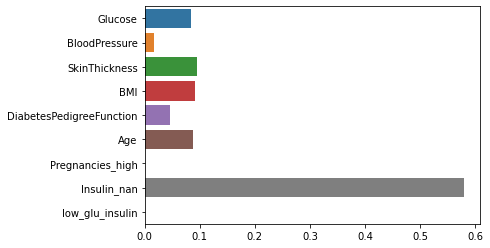

In [ ]:
# feature의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도 측정하기

In [ ]:
# 실제값 - 예측값 해보기
# 만약 0이 나온다면 실제값 = 예측값 인 것

abs(y_test - y_predict)

614    0
615    0
616    0
617    0
618    0
      ..
763    1
764    0
765    0
766    0
767    0
Name: Outcome, Length: 154, dtype: int64

In [ ]:
abs(y_test - y_predict).sum() / len(y_test)

0.13636363636363635

` ex) 0.28 정도를 잘못 예측했다고 볼 수 있다.(위의 코드 결과에서 0.**) `

* 범주형 데이터로 바꾸면서의 틀린 개수 변화

    - 1주차 -> "Pregnancies"범주화 -> "Age"원핫인코딩 -> 인슐린 결측치 채우기
    
          : 43 -> 37 -> 51(나이 25세 기준)
                          -> 55(나이 30세 기준)  -> 24

In [ ]:
diff_count = abs(y_test - y_predict).sum()
diff_count

21

In [ ]:
# 예측의 정확도 구하기. 100점 만점 중에 몇 점을 맞았는가?

(len(y_test) - diff_count) / len(y_test) * 100

86.36363636363636

In [ ]:
# 위의 방법말고 알고리즘 사용해보기

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

86.36363636363636

In [ ]:
# model의 score로 점수 계산

model.score(X_test,y_test) * 100

86.36363636363636